In [1]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import scipy.interpolate as interpol
import scipy.optimize as opt

import axion_mass
import g_star
import eom
import density_plot
from config import plot_path, model
import runner
import potential
import qcd_axion_wkb

In [2]:
Omega_a_h_sq_harm, theta_i_s_harm, f_a_s_harm = runner.load_data("harmonic.npz")
Omega_a_h_sq, theta_i_s, f_a_s = runner.load_data("cosine.npz")

/home/janik/Documents/bachelor/Code/density_plot.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(f_a / 1e9, theta_i, np.log10(Omega_a_h_sq))


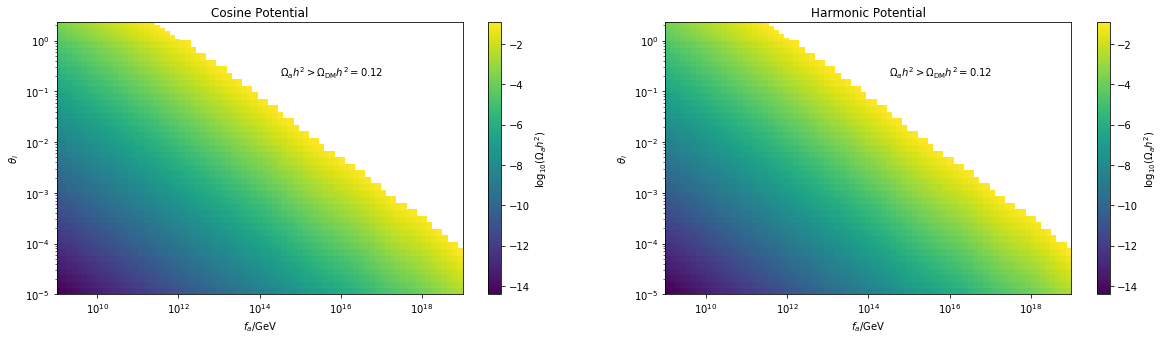

In [3]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Cosine Potential")
density_plot.plot_density(theta_i_s, f_a_s, Omega_a_h_sq, plot_type="pcolormesh")
plt.subplot(1,2,2)
plt.title("Harmonic Potential")
density_plot.plot_density(theta_i_s_harm, f_a_s_harm, Omega_a_h_sq_harm, plot_type="pcolormesh")

## Anharmonic Correction

In [4]:
f = Omega_a_h_sq / Omega_a_h_sq_harm # anharmonic correction

Text(0,0.5,'f')

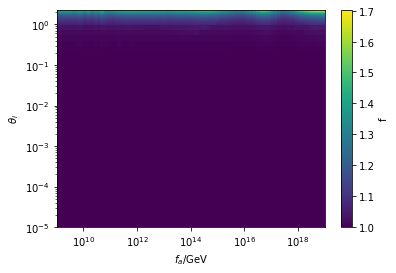

In [5]:
fig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, f)
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
cbar = plt.colorbar()
cbar.ax.set_ylabel("f")

Text(0,0.5,'$f = \\Omega_{a, \\cos} / \\Omega_{a, \\mathrm{harm}}$')

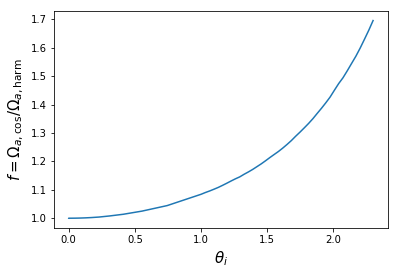

In [14]:
plt.plot(theta_i_s, inte.simps(f, f_a_s, axis=1) / (f_a_s[-1] - f_a_s[0]), "-") 
plt.xlabel(r"$\theta_i$", fontsize=15)
plt.ylabel(r"$f = \Omega_{a, \cos} / \Omega_{a, \mathrm{harm}}$", fontsize=15)
# I need more points in the higher range

## $\Omega_a = \Omega_\mathrm{DM}$

bad
bad


Text(0,0.5,'$\\theta_0$')

/usr/local/lib/python3.6/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


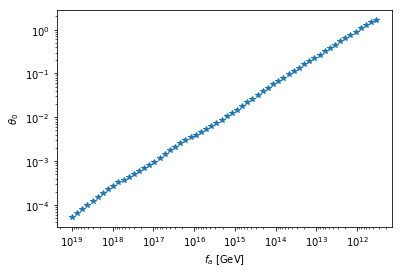

In [19]:
# I have to exclude the points where Omega_a / Omega_DM = 1 not included in the simulation
# Oh also more points! 

R_a = Omega_a_h_sq / model.Omega_DM_h_sq

#fig = plt.gcf()
#ax = plt.gca()
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.invert_xaxis()
#plt.ylim((np.min(theta_i_s), np.max(theta_i_s)))
#R_a_display = R_a.copy()
#R_a_display[R_a_display > 1] = 0
#plt.pcolormesh(f_a_s / 1e9, theta_i_s, np.log10(R_a_display))
#plt.xlabel(r"$f_a / \mathrm{GeV}$")
#plt.ylabel(r"$\theta_i$")
#cbar = plt.colorbar()
#cbar.ax.set_ylabel("log10 R_a")
#plt.show()

R_a_avg = 1 / (theta_i_s[-1] - theta_i_s[0]) * inte.simps(R_a, theta_i_s, axis=0)

def solve_inital_theta(i, f_a):
    # print(f_a / 1e9, np.min(R_a[:, i]), np.max(R_a[:, i]), end="")
    if np.min(R_a[:, i]) <= 1 <= np.max(R_a[:, i]):
        R_a_interp = interpol.interp1d(theta_i_s, R_a[:, i], bounds_error=False)
        ans = opt.root(lambda theta: R_a_interp(theta) - 1.0, 1.0).x[0]
        if np.abs(R_a_interp(ans) - 1) > 1e-5:
            print("bad")
            return np.NAN
        # print("", ans,  R_a_interp(1.0))
        return ans
    else:
        return np.NAN

theta_0 = np.array([solve_inital_theta(i, f_a) for i, f_a in enumerate(f_a_s)])

# print(theta_0)

plt.loglog(f_a_s / 1e9, theta_0, "*")
plt.gca().invert_xaxis()
plt.xlabel("$f_a$ [GeV]")
plt.ylabel(r"$\theta_0$")

## Relative Error of the Analytic Solution

In [8]:
Omega_a_h_sq_analytic = qcd_axion_wkb.compute_analytic_relic_density(theta_i_s, f_a_s)

Text(0,0.5,'$\\theta_i$')

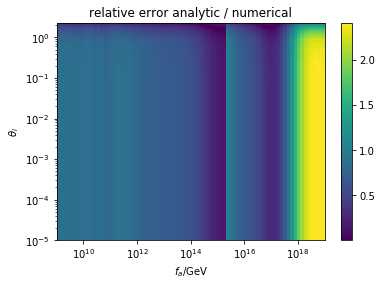

In [17]:
rel_err_analytic = np.abs(Omega_a_h_sq_analytic - Omega_a_h_sq) / Omega_a_h_sq 
fig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.title("relative error analytic / numerical")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, rel_err_analytic)
plt.colorbar()
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")